# An Economic Analysis of Virginia from 2001 to 2018

### DATS 6103 - Fall 2020 - Joseph Valle 

## 1. Introduction 

As the US's economy continues to evolve with the rapid tide of globalization and interstate commerce, the opportunities for growth and development for businesses among a variety of sectors have likewise expanded notably over the last two decades. One state that has especially drawn attention as of late for its economic potence is Virginia, partly on account of its proximity to Washington, DC, as well as the nationwide shift toward more technological jobs.

This project will interpret the trends in population, income, and GDP by industry throughout Virginia from 2001 to 2018.  Rather than analyze Virginia as a whole, we can delve further and examine its individual geographic areas.  As a reference over the course of this project, a geographic area can be defined as a county or independent city within Virginia.  We do this in order to take into account the impact of geography on predominant industries.  Of course, we can also consider how the rise of an industry in a certain area can affect said area's population and income over time.

Our data can be found at the [Bureau of Economic Analysis](https://apps.bea.gov/regional/downloadzip.cfm), and downloaded and converted as CSV files with the help of Pandas.  After cleaning up our data to focus on the years 2001 through 2018, we will first look at trends in personal and per capita income in both absolute and relative figures.  Similarly, we will pivot toward population, and isolate the areas with the most significant absolute and relative shifts in this regard.  Finally, we will expand our inquiry toward identifying which areas contributed the most in terms of GDP and share of GDP for a given industry.  As an extension to this last point, we will also determine the most significant sectros for a given area, and based on their share values evaluate whether or not that area reported a diversified economy, or relied disproportionately to one particular sector.  With this in mind, we can deduce if there are any industries drawing more people toward certain areas.

Any references that were helpful in completing this project are listed at the bottom of this Jupyter Notebook.  The GitHub.io, GitHub repository, and Zenodo links for this project are also provided in its accompanying Word document.

## 2. Installing Our Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
pop_inc = pd.read_csv("pop_inc.csv")
ind_gdp = pd.read_csv("ind_gdp.csv")

#Respectively, our data sets consist of figures with regard to population and income, and GDP by industry.

In [3]:
pop_inc.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"""00000""",United States,,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,12051307000,12541995000,13315478000,13998383000,14175503000,14982715000,15709242000,16111636000,16870106000,17813035000
1,"""00000""",United States,,CAINC1,2.0,...,Population (persons) 1/,Number of persons,201298000,203798722,...,306771529,309326085,311580009,313874218,316057727,318386421,320742673,323071342,325147121,327167434
2,"""00000""",United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,39284,40546,42735,44599,44851,47058,48978,49870,51885,54446
3,"""01000""",Alabama,5,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,9737715,10628318,...,155145273,161516561,167942757,172804075,174415510,180457769,187544435,190814674,197283188,206455011
4,"""01000""",Alabama,5,CAINC1,2.0,...,Population (persons) 1/,Number of persons,3440000,3449846,...,4757938,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871


In [4]:
ind_gdp.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"""00000""",United States *,,CAGDP2,1.0,...,All industry total,Thousands of dollars,10581822000,10936418000,...,14448932000,14992052000,15542582000,16197007000,16784851000,17527258000,18224780000,18715040000,19519424000,20580223000
1,"""00000""",United States *,,CAGDP2,2.0,...,Private industries,Thousands of dollars,9188887407,9462019658,...,12403879944,12884088643,13405519970,14037519000,14572341002,15255889000,15883937000,16326092000,17065802000,18035586000
2,"""00000""",United States *,,CAGDP2,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of dollars,99835618,95628974,...,129967839,146299048,180944850,179573000,215600643,201003000,180655000,164281000,174579000,166464000
3,"""00000""",United States *,,CAGDP2,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of dollars,123924346,112417015,...,275840872,305838102,356315451,358798000,386518621,416375000,259863000,215621000,287324000,346645000
4,"""00000""",United States *,,CAGDP2,10.0,22,Utilities,Thousands of dollars,181332474,177617765,...,258241011,278837008,287459067,279651000,286340248,298076000,299214000,302355000,315114000,325852000


In [5]:
print(pop_inc.shape)
print(ind_gdp.shape)

(9597, 58)
(107988, 26)


In [6]:
pop_inc = pop_inc[pop_inc['GeoName'].str.contains('VA', na=False)]
ind_gdp = ind_gdp[ind_gdp['GeoName'].str.contains('VA', na=False)]
pop_inc = pop_inc.iloc[:,np.r_[1,6,7,40:58]]
ind_gdp = ind_gdp.iloc[:,np.r_[1,6:26]]

#Upon inspecting both data sets at first glance, we notice that we can study the years 2001 through 2018 in each for
#the duration of our project.  We also make sure to include the columns indicating the names of geographic areas
#(defined as counties and independent cities for this project), descriptions of variables to study, and units for 
#these variables.  Recall that figures pertaining to the whole state of Virginia are not included.

## 3. Cleaning Up Our Data 

Before we can analyze the economic trends characterizing Virginia's counties and independent cities, we need to take several more steps toward cleaning up our data.  In particular, upon observing both data sets, we notice that the Bureau of Economic Analysis has occasionally consolidated one or more cities under an adjacent county's name for statistical purposes.  As a note for later visualizations, some counties may report higher figures for population, income, and GDP because they also incorporated a number of cities within their definitions.  As an example, Fairfax County included under its description Fairfax City and Falls Church, despite these two being independent.  This should not be conflated with any cities that already present their own separate figures, such as Alexandria and Virginia Beach. 

Additionally, from our GDP by industry data set, we notice that some areas did not report any figures for certain industries, regardless of the year.  To resolve this, we can isolate our industries of interest by consolidating some under one description for simplicity purposes.  For instance, we can analyze the trade industry without having to inspect wholesale and retail trade in separate descriptions.  In doing so, we can add the individual industries together to obtain the total GDP values for each area from 2001 to 2018, and avoid reporting aggregate figures that may not account for certain sectors.  This latter observation will be especially important in the final section of our project.

In [7]:
list(pop_inc.GeoName.unique())

#Note that some counties have neighboring independent cities (cities not enclosed within any county) attached to their 
#name by the Bureau of Economic Analysis, our original data's source, for statistical purposes.

['Accomack, VA',
 'Amelia, VA',
 'Amherst, VA',
 'Appomattox, VA',
 'Arlington, VA',
 'Bath, VA',
 'Bedford, VA*',
 'Bland, VA',
 'Botetourt, VA',
 'Brunswick, VA',
 'Buchanan, VA',
 'Buckingham, VA',
 'Caroline, VA',
 'Charles City, VA',
 'Charlotte, VA',
 'Chesterfield, VA',
 'Clarke, VA',
 'Craig, VA',
 'Culpeper, VA',
 'Cumberland, VA',
 'Dickenson, VA',
 'Essex, VA',
 'Fauquier, VA',
 'Floyd, VA',
 'Fluvanna, VA',
 'Franklin, VA',
 'Giles, VA',
 'Gloucester, VA',
 'Goochland, VA',
 'Grayson, VA',
 'Greene, VA',
 'Halifax, VA',
 'Hanover, VA',
 'Henrico, VA',
 'Highland, VA',
 'Isle of Wight, VA',
 'King and Queen, VA',
 'King George, VA',
 'King William, VA',
 'Lancaster, VA',
 'Lee, VA',
 'Loudoun, VA',
 'Louisa, VA',
 'Lunenburg, VA',
 'Madison, VA',
 'Mathews, VA',
 'Mecklenburg, VA',
 'Middlesex, VA',
 'Nelson, VA',
 'New Kent, VA',
 'Northampton, VA',
 'Northumberland, VA',
 'Nottoway, VA',
 'Orange, VA',
 'Page, VA',
 'Patrick, VA',
 'Powhatan, VA',
 'Prince Edward, VA',
 'P

In [8]:
pop_inc = pop_inc.replace('Bedford, VA*','Bedford, VA')
ind_gdp = ind_gdp.replace('Bedford, VA*','Bedford, VA')

#We remove the asterisk next to Bedford County's name for convenience.

In [9]:
pop_inc = pop_inc.replace('Albemarle + Charlottesville, VA*','Albemarle, VA')
pop_inc = pop_inc.replace('Alleghany + Covington, VA*','Alleghany, VA')
pop_inc = pop_inc.replace('Augusta, Staunton + Waynesboro, VA*','Augusta, VA')
pop_inc = pop_inc.replace('Campbell + Lynchburg, VA*','Campbell, VA')
pop_inc = pop_inc.replace('Carroll + Galax, VA*','Carroll, VA')
pop_inc = pop_inc.replace('Dinwiddie, Colonial Heights + Petersburg, VA*','Dinwiddie, VA')
pop_inc = pop_inc.replace('Fairfax, Fairfax City + Falls Church, VA*','Fairfax, VA')
pop_inc = pop_inc.replace('Frederick + Winchester, VA*','Frederick, VA')
pop_inc = pop_inc.replace('Greensville + Emporia, VA*','Greensville, VA')
pop_inc = pop_inc.replace('Henry + Martinsville, VA*','Henry, VA')
pop_inc = pop_inc.replace('James City + Williamsburg, VA*','James City, VA')
pop_inc = pop_inc.replace('Montgomery + Radford, VA*','Montgomery, VA')
pop_inc = pop_inc.replace('Pittsylvania + Danville, VA*','Pittsylvania, VA')
pop_inc = pop_inc.replace('Prince George + Hopewell, VA*','Prince George, VA')
pop_inc = pop_inc.replace('Prince William, Manassas + Manassas Park, VA*','Prince William, VA')
pop_inc = pop_inc.replace('Roanoke + Salem, VA*','Roanoke, VA')
pop_inc = pop_inc.replace('Rockbridge, Buena Vista + Lexington, VA*','Rockbridge, VA')
pop_inc = pop_inc.replace('Rockingham + Harrisonburg, VA*','Rockingham, VA')
pop_inc = pop_inc.replace('Southampton + Franklin, VA*','Southampton, VA')
pop_inc = pop_inc.replace('Spotsylvania + Fredericksburg, VA*','Spotsylvania, VA')
pop_inc = pop_inc.replace('Washington + Bristol, VA*','Washington, VA')
pop_inc = pop_inc.replace('Wise + Norton, VA*','Wise, VA')
pop_inc = pop_inc.replace('York + Poquoson, VA*','York, VA')

#For simplicity purposes, we rename the counties with neighboring independent cities with only the county name in our
#population and income data set.

In [10]:
ind_gdp = ind_gdp.replace('Albemarle + Charlottesville, VA*','Albemarle, VA')
ind_gdp = ind_gdp.replace('Alleghany + Covington, VA*','Alleghany, VA')
ind_gdp = ind_gdp.replace('Augusta, Staunton + Waynesboro, VA*','Augusta, VA')
ind_gdp = ind_gdp.replace('Campbell + Lynchburg, VA*','Campbell, VA')
ind_gdp = ind_gdp.replace('Carroll + Galax, VA*','Carroll, VA')
ind_gdp = ind_gdp.replace('Dinwiddie, Colonial Heights + Petersburg, VA*','Dinwiddie, VA')
ind_gdp = ind_gdp.replace('Fairfax, Fairfax City + Falls Church, VA*','Fairfax, VA')
ind_gdp = ind_gdp.replace('Frederick + Winchester, VA*','Frederick, VA')
ind_gdp = ind_gdp.replace('Greensville + Emporia, VA*','Greensville, VA')
ind_gdp = ind_gdp.replace('Henry + Martinsville, VA*','Henry, VA')
ind_gdp = ind_gdp.replace('James City + Williamsburg, VA*','James City, VA')
ind_gdp = ind_gdp.replace('Montgomery + Radford, VA*','Montgomery, VA')
ind_gdp = ind_gdp.replace('Pittsylvania + Danville, VA*','Pittsylvania, VA')
ind_gdp = ind_gdp.replace('Prince George + Hopewell, VA*','Prince George, VA')
ind_gdp = ind_gdp.replace('Prince William, Manassas + Manassas Park, VA*','Prince William, VA')
ind_gdp = ind_gdp.replace('Roanoke + Salem, VA*','Roanoke, VA')
ind_gdp = ind_gdp.replace('Rockbridge, Buena Vista + Lexington, VA*','Rockbridge, VA')
ind_gdp = ind_gdp.replace('Rockingham + Harrisonburg, VA*','Rockingham, VA')
ind_gdp = ind_gdp.replace('Southampton + Franklin, VA*','Southampton, VA')
ind_gdp = ind_gdp.replace('Spotsylvania + Fredericksburg, VA*','Spotsylvania, VA')
ind_gdp = ind_gdp.replace('Washington + Bristol, VA*','Washington, VA')
ind_gdp = ind_gdp.replace('Wise + Norton, VA*','Wise, VA')
ind_gdp = ind_gdp.replace('York + Poquoson, VA*','York, VA')

#We also do this for our GDP by industry data set.

In [11]:
pop_inc = pop_inc.sort_values(by='GeoName')
ind_gdp = ind_gdp.sort_values(by='GeoName')

#We sort the cities and counties in alphabetical order in both data sets.

In [12]:
list(ind_gdp.Description.unique())

['All industry total',
 '   Administrative and support and waste management and remediation services',
 '  Educational services, health care, and social assistance',
 '   Educational services',
 '   Health care and social assistance',
 '  Arts, entertainment, recreation, accommodation, and food services',
 '   Arts, entertainment, and recreation',
 '   Management of companies and enterprises',
 '   Accommodation and food services',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transportation and utilities',
 'Manufacturing and information',
 'Private goods-producing industries 2/',
 '  Other services (except government and government enterprises)',
 '   Professional, scientific, and technical services',
 'Private services-providing industries 3/',
 '   Real estate and rental and leasing',
 ' Private industries',
 '  Agriculture, forestry, fishing and hunting',
 '  Mining, quarrying, and oil and gas extraction',
 '  Utilities',
 '  Professional a

In [13]:
ind_gdp = ind_gdp[(ind_gdp.Description == '  Utilities')|
                  (ind_gdp.Description == '  Construction')|
                  (ind_gdp.Description == '  Manufacturing')|
                  (ind_gdp.Description == '  Transportation and warehousing')|
                  (ind_gdp.Description == '  Information')|
                  (ind_gdp.Description == '  Finance, insurance, real estate, rental, and leasing')|
                  (ind_gdp.Description == '  Professional and business services')|
                  (ind_gdp.Description == '  Educational services, health care, and social assistance')|
                  (ind_gdp.Description == '  Arts, entertainment, recreation, accommodation, and food services')|
                  (ind_gdp.Description == '  Other services (except government and government enterprises)')|
                  (ind_gdp.Description == 'Government and government enterprises')|
                  (ind_gdp.Description == 'Natural resources and mining')|
                  (ind_gdp.Description == 'Trade')]

#We select the industries that jointly form the whole of each area's GDP.

In [14]:
list(pop_inc.Description.unique())

['Personal income (thousands of dollars)',
 'Population (persons) 1/',
 'Per capita personal income (dollars) 2/']

In [15]:
pop_inc = pop_inc.replace('Personal income (thousands of dollars)','Personal income')
pop_inc = pop_inc.replace('Population (persons) 1/','Population')
pop_inc = pop_inc.replace('Per capita personal income (dollars) 2/','Per capita personal income')
pop_inc.head()

#We rename each of the descriptions in our population and income data set for our convenience.

,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8673,"Accomack, VA",Personal income,Thousands of dollars,798158,827094,881556,921178,955300,979101,1033169,...,1092338,1114647,1131424,1185059,1192333,1234064,1281707,1288081,1325930,1386063
8674,"Accomack, VA",Population,Number of persons,37742,37308,36742,36310,35835,35192,34553,...,33415,33147,33221,33264,32966,32970,32910,32850,32566,32412
8675,"Accomack, VA",Per capita personal income,Dollars,21148,22169,23993,25370,26658,27822,29901,...,32690,33627,34057,35626,36169,37430,38946,39211,40715,42764
8919,"Albemarle, VA",Personal income,Thousands of dollars,4673545,4769895,5104606,5459814,5877106,6463224,6897809,...,6859572,7240429,7657164,8457472,8328130,8935308,9550724,10091356,11027861,11702008
8920,"Albemarle, VA",Population,Number of persons,126438,127599,128315,129772,132273,134918,136547,...,141125,142659,143960,146043,147286,149265,151552,153644,155690,156835


In [16]:
ind_gdp = ind_gdp.replace('  Utilities','Utilities')
ind_gdp = ind_gdp.replace('  Construction','Construction')
ind_gdp = ind_gdp.replace('  Manufacturing','Manufacturing')
ind_gdp = ind_gdp.replace('  Transportation and warehousing','Transportation and warehousing')
ind_gdp = ind_gdp.replace('  Information','Information')
ind_gdp = ind_gdp.replace('  Finance, insurance, real estate, rental, and leasing',
                  'Finance, insurance, real estate, rental, and leasing')
ind_gdp = ind_gdp.replace('  Professional and business services','Professional and business services')
ind_gdp = ind_gdp.replace('  Educational services, health care, and social assistance',
                  'Educational services, health care, and social assistance')
ind_gdp = ind_gdp.replace('  Arts, entertainment, recreation, accommodation, and food services',
                  'Arts, entertainment, recreation, accommodation, and food services')
ind_gdp = ind_gdp.replace('  Other services (except government and government enterprises)',
                  'Other services (except government and government enterprises)')
ind_gdp.iloc[:13]

#Similarly as with our population and income data set, we clean up the descriptions in our GDP by industry data set by
#removing any unnecessary spaces.

,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
97600,"Accomack, VA","Educational services, health care, and social ...",Thousands of dollars,27223,28647,32077,37547,41549,42389,41554,...,50434,48325,46856,50557,(D),(D),(D),(D),(D),(D)
97603,"Accomack, VA","Arts, entertainment, recreation, accommodation...",Thousands of dollars,34126,37456,39080,39118,38107,37866,39701,...,38456,39535,41137,44429,45583,47178,47772,49971,51275,53617
97607,"Accomack, VA",Government and government enterprises,Thousands of dollars,156465,167679,175405,184208,192721,197611,203717,...,218814,225499,223419,229542,234298,247339,254782,258345,267064,273468
97608,"Accomack, VA",Natural resources and mining,Thousands of dollars,83645,65085,88560,133653,134892,130349,119118,...,113148,108568,118920,103134,138035,118326,102373,85647,97286,88750
97609,"Accomack, VA",Trade,Thousands of dollars,76146,79415,85706,82571,(D),89493,86126,...,85528,89499,96774,100664,109832,110322,113873,115564,116106,120973
97606,"Accomack, VA",Other services (except government and governme...,Thousands of dollars,23772,25855,27864,29623,29898,30268,29452,...,28465,28217,27913,28727,28233,29084,30137,29309,30166,31614
97584,"Accomack, VA",Utilities,Thousands of dollars,5866,10268,14620,12140,(D),8216,8129,...,9843,12892,11826,14373,12593,20990,19480,18410,25643,28675
97596,"Accomack, VA",Professional and business services,Thousands of dollars,56653,65408,71020,84238,95110,97100,102973,...,115628,124464,113227,133154,135050,132552,141455,140972,138905,152281
97586,"Accomack, VA",Manufacturing,Thousands of dollars,813624,694819,621442,565466,534804,582652,568388,...,1201961,1362066,1330363,1441586,1510046,1565767,1752051,1802328,1804397,1852963
97585,"Accomack, VA",Construction,Thousands of dollars,29243,34470,35598,41966,42699,46380,44505,...,41002,41771,37284,45787,40722,36705,51381,55549,42424,40633


In [17]:
ind_gdp = ind_gdp.replace('(D)',0) #We replace any 'D' values with zeros to maintain consistency.
ind_gdp.head()

,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
97600,"Accomack, VA","Educational services, health care, and social ...",Thousands of dollars,27223,28647,32077,37547,41549,42389,41554,...,50434,48325,46856,50557,0,0,0,0,0,0
97603,"Accomack, VA","Arts, entertainment, recreation, accommodation...",Thousands of dollars,34126,37456,39080,39118,38107,37866,39701,...,38456,39535,41137,44429,45583,47178,47772,49971,51275,53617
97607,"Accomack, VA",Government and government enterprises,Thousands of dollars,156465,167679,175405,184208,192721,197611,203717,...,218814,225499,223419,229542,234298,247339,254782,258345,267064,273468
97608,"Accomack, VA",Natural resources and mining,Thousands of dollars,83645,65085,88560,133653,134892,130349,119118,...,113148,108568,118920,103134,138035,118326,102373,85647,97286,88750
97609,"Accomack, VA",Trade,Thousands of dollars,76146,79415,85706,82571,0,89493,86126,...,85528,89499,96774,100664,109832,110322,113873,115564,116106,120973


In [18]:
pop_inc = pop_inc.sort_values(by='GeoName') #We sort the areas in alphabetical order for both data sets.
ind_gdp = ind_gdp.sort_values(by='GeoName')

In [19]:
pop_inc.dtypes #This is to ensure that we are working with floats so we can visualize our data later.

GeoName        object
Description    object
Unit           object
2001           object
2002           object
2003           object
2004           object
2005           object
2006           object
2007           object
2008           object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
2018           object
dtype: object

In [20]:
ind_gdp.dtypes

GeoName        object
Description    object
Unit           object
2001           object
2002           object
2003           object
2004           object
2005           object
2006           object
2007           object
2008           object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
2018           object
dtype: object

In [21]:
pop_inc = pop_inc.apply(pd.to_numeric, errors='ignore', downcast='float')
ind_gdp = ind_gdp.apply(pd.to_numeric, errors='ignore', downcast='float')
pop_inc = pop_inc.set_index('GeoName') 
ind_gdp = ind_gdp.set_index('GeoName')
print(pop_inc.shape)
print(ind_gdp.shape)

#After converting the numeric (year) columns to floats, we can establish our index as GeoName.

(315, 20)
(1365, 20)


In [22]:
sb.set(rc={'figure.figsize':(10,5)}) #We assign a default figure size for our visualizations.

## 4. Evaluating Trends in Income  

In [23]:
total_inc = pop_inc[(pop_inc.Description == 'Personal income')]
total_inc['01-18 Ab Inc'] = total_inc['2018']-total_inc['2001']
total_inc['01-18 Pct Inc'] = (total_inc['2018']-total_inc['2001'])/total_inc['2001']*100
total_inc = total_inc.iloc[:,np.r_[0,2:22]]
total_inc.head()

#We calculate the absolute and relative changes in personal income (total income over the whole population) throughout
#Virginia from 2001 to 2018.

,Description,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,01-18 Ab Inc,01-18 Pct Inc
GeoName,,,,,,,,,,,,,,,,,,,,,
"Accomack, VA",Personal income,798158.0,827094.0,881556.0,921178.0,955300.0,979101.0,1033169.0,1089135.0,1092338.0,...,1131424.0,1185059.0,1192333.0,1234064.0,1281707.0,1288081.0,1325930.0,1386063.0,587905.0,73.657722
"Albemarle, VA",Personal income,4673545.0,4769895.0,5104606.0,5459814.0,5877106.0,6463224.0,6897809.0,7167152.0,6859572.0,...,7657164.0,8457472.0,8328130.0,8935308.0,9550724.0,10091356.0,11027861.0,11702008.0,7028463.0,150.388260
"Alexandria (Independent City), VA",Personal income,6970776.0,7044342.0,7308409.0,7945125.0,8480858.0,9067312.0,9318719.0,9954991.0,9963806.0,...,11424532.0,12143013.0,11711094.0,12316722.0,12749013.0,13027528.0,13420320.0,14127927.0,7157151.0,102.673660
"Alleghany, VA",Personal income,556362.0,566680.0,588800.0,603056.0,618782.0,638739.0,656422.0,707451.0,689865.0,...,724411.0,767944.0,720625.0,738863.0,771583.0,774653.0,785845.0,816049.0,259687.0,46.675907
"Amelia, VA",Personal income,291481.0,291610.0,304391.0,339501.0,362798.0,386528.0,416917.0,418772.0,404473.0,...,437706.0,460323.0,494560.0,511085.0,539074.0,542679.0,558329.0,582640.0,291159.0,99.889526


In [24]:
total_inc['2001'] = total_inc['2001']*1000/(10**9)
total_inc['2002'] = total_inc['2002']*1000/(10**9)
total_inc['2003'] = total_inc['2003']*1000/(10**9)
total_inc['2004'] = total_inc['2004']*1000/(10**9)
total_inc['2005'] = total_inc['2005']*1000/(10**9)
total_inc['2006'] = total_inc['2006']*1000/(10**9)
total_inc['2007'] = total_inc['2007']*1000/(10**9)
total_inc['2008'] = total_inc['2008']*1000/(10**9)
total_inc['2009'] = total_inc['2009']*1000/(10**9)
total_inc['2010'] = total_inc['2010']*1000/(10**9)
total_inc['2011'] = total_inc['2011']*1000/(10**9)
total_inc['2012'] = total_inc['2012']*1000/(10**9)
total_inc['2013'] = total_inc['2013']*1000/(10**9)
total_inc['2014'] = total_inc['2014']*1000/(10**9)
total_inc['2015'] = total_inc['2015']*1000/(10**9)
total_inc['2016'] = total_inc['2016']*1000/(10**9)
total_inc['2017'] = total_inc['2017']*1000/(10**9)
total_inc['2018'] = total_inc['2018']*1000/(10**9)
total_inc['01-18 Ab Inc'] = total_inc['01-18 Ab Inc']*1000/(10**9)
total_inc.head()

#For the personal income figures, we multiply each year column by 1000 and then divide said column by one billion.

,Description,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,01-18 Ab Inc,01-18 Pct Inc
GeoName,,,,,,,,,,,,,,,,,,,,,
"Accomack, VA",Personal income,0.798158,0.827094,0.881556,0.921178,0.955300,0.979101,1.033169,1.089135,1.092338,...,1.131424,1.185059,1.192333,1.234064,1.281707,1.288081,1.325930,1.386063,0.587905,73.657722
"Albemarle, VA",Personal income,4.673545,4.769895,5.104606,5.459814,5.877106,6.463224,6.897809,7.167152,6.859572,...,7.657164,8.457472,8.328130,8.935308,9.550724,10.091356,11.027862,11.702008,7.028463,150.388260
"Alexandria (Independent City), VA",Personal income,6.970776,7.044342,7.308409,7.945125,8.480858,9.067312,9.318719,9.954991,9.963806,...,11.424532,12.143013,11.711094,12.316722,12.749013,13.027528,13.420320,14.127927,7.157151,102.673660
"Alleghany, VA",Personal income,0.556362,0.566680,0.588800,0.603056,0.618782,0.638739,0.656422,0.707451,0.689865,...,0.724411,0.767944,0.720625,0.738863,0.771583,0.774653,0.785845,0.816049,0.259687,46.675907
"Amelia, VA",Personal income,0.291481,0.291610,0.304391,0.339501,0.362798,0.386528,0.416917,0.418772,0.404473,...,0.437706,0.460323,0.494560,0.511085,0.539074,0.542679,0.558329,0.582640,0.291159,99.889526


In [25]:
capita_inc = pop_inc[(pop_inc.Description == 'Per capita personal income')]
capita_inc['01-18 Ab Capita'] = capita_inc['2018']-capita_inc['2001']
capita_inc['01-18 Pct Capita'] = (capita_inc['2018']-capita_inc['2001'])/capita_inc['2001']*100
capita_inc.head()

#We now calculate the absolute and relative changes in per-capita income throughout Virginia from 2001 to 2018.

,Description,Unit,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,01-18 Ab Capita,01-18 Pct Capita
GeoName,,,,,,,,,,,,,,,,,,,,,
"Accomack, VA",Per capita personal income,Dollars,21148.0,22169.0,23993.0,25370.0,26658.0,27822.0,29901.0,32062.0,...,34057.0,35626.0,36169.0,37430.0,38946.0,39211.0,40715.0,42764.0,21616.0,102.212975
"Albemarle, VA",Per capita personal income,Dollars,36963.0,37382.0,39782.0,42072.0,44432.0,47905.0,50516.0,51484.0,...,53190.0,57911.0,56544.0,59862.0,63019.0,65680.0,70832.0,74613.0,37650.0,101.858612
"Alexandria (Independent City), VA",Per capita personal income,Dollars,53240.0,53933.0,56470.0,61703.0,66163.0,71018.0,72140.0,74878.0,...,79216.0,82429.0,78244.0,81336.0,82860.0,82954.0,84059.0,88008.0,34768.0,65.304283
"Alleghany, VA",Per capita personal income,Dollars,23775.0,24388.0,25693.0,26407.0,27316.0,28334.0,29062.0,31590.0,...,32816.0,35104.0,33131.0,34563.0,36601.0,37033.0,38161.0,40061.0,16286.0,68.500526
"Amelia, VA",Per capita personal income,Dollars,25388.0,25269.0,26368.0,28987.0,30377.0,31553.0,33495.0,33334.0,...,34324.0,36112.0,39068.0,40192.0,42174.0,42420.0,43064.0,44774.0,19386.0,76.358910


In [26]:
total_inc_ab = total_inc.iloc[:,[19]].sort_values(by='01-18 Ab Inc')
total_inc_pct = total_inc.iloc[:,[20]].sort_values(by='01-18 Pct Inc')

#We assemble the absolute changes in personal income together and sort the figures from low to high in its own
#dataframe.  We also do this for the relative changes in personal income.

In [27]:
capita_inc_ab = capita_inc.iloc[:,[20]].sort_values(by='01-18 Ab Capita')
capita_inc_pct = capita_inc.iloc[:,[21]].sort_values(by='01-18 Pct Capita')

#Much like we did earlier with personal income, we collect the absolute and relative changes in per-capita income 
#together and sort their individual dataframes from low to high.

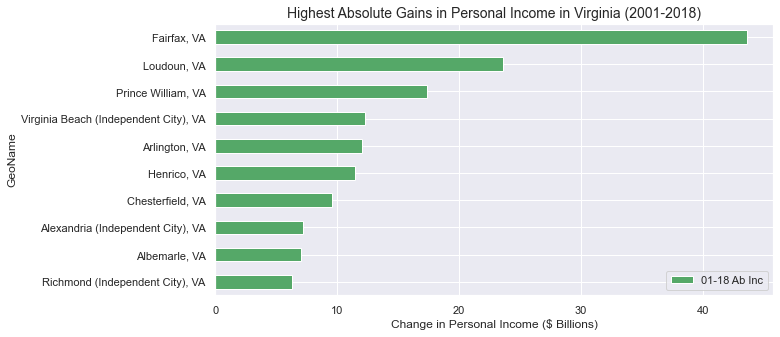

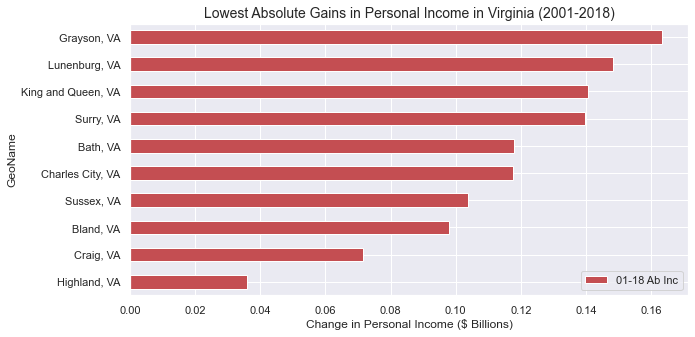

In [28]:
total_inc_ab.iloc[-10:].plot(kind='barh',color='g')
plt.title('Highest Absolute Gains in Personal Income in Virginia (2001-2018)',size=14)
plt.xlabel('Change in Personal Income ($ Billions)')
plt.show()
print() #We allow an extra space between our graphs for convenience.

total_inc_ab.iloc[:10].plot(kind='barh',color='r')
plt.title('Lowest Absolute Gains in Personal Income in Virginia (2001-2018)',size=14)
plt.xlabel('Change in Personal Income ($ Billions)')
plt.show()

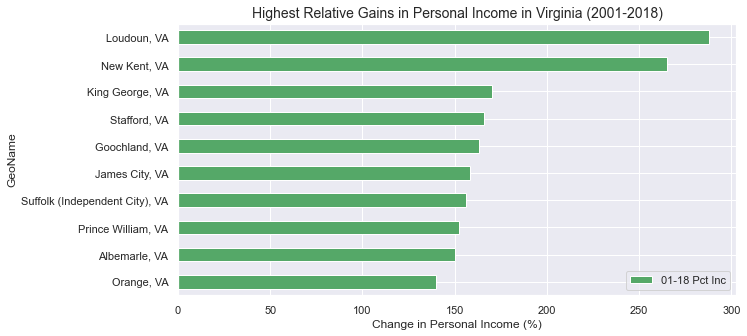

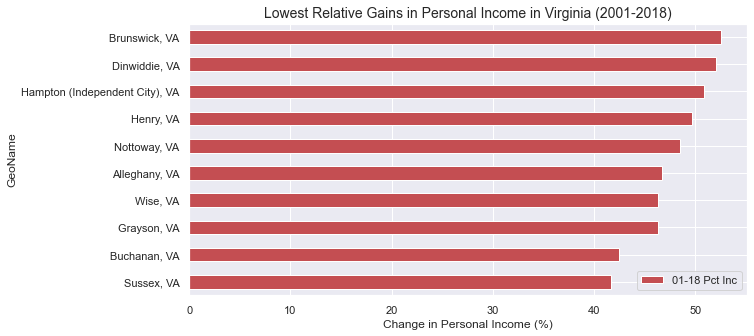

In [29]:
total_inc_pct.iloc[-10:].plot(kind='barh',color='g')
plt.title('Highest Relative Gains in Personal Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Personal Income (%)')
plt.show()
print()

total_inc_pct.iloc[:10].plot(kind='barh',color='r')
plt.title('Lowest Relative Gains in Personal Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Personal Income (%)')
plt.show()

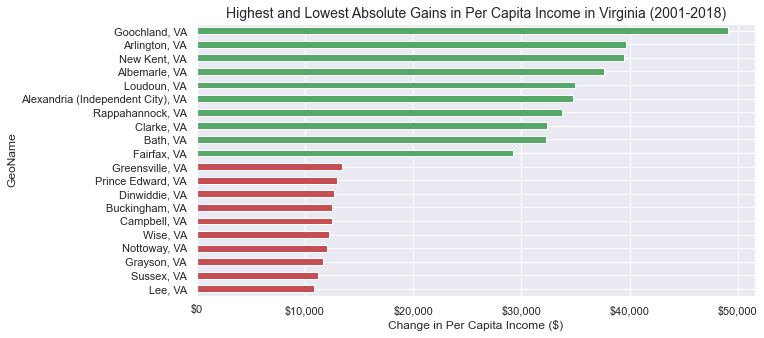

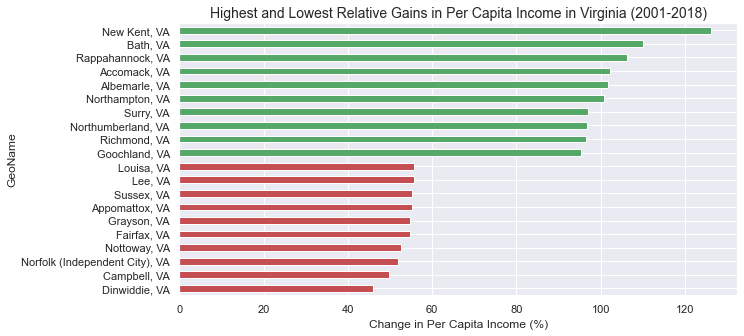

In [30]:
a = capita_inc_ab.iloc[np.r_[:10,-10:0],0].plot(kind='barh',color=['r','r','r','r','r','r','r','r','r','r',
                                                                   'g','g','g','g','g','g','g','g','g','g'])
plt.title('Highest and Lowest Absolute Gains in Per Capita Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Per Capita Income ($)')
fmt1 = '${x:,.0f}' #We format our X-axis in dollars separated by commas.
t1 = mtick.StrMethodFormatter(fmt1)
a.xaxis.set_major_formatter(t1)
plt.show()
print()

capita_inc_pct.iloc[np.r_[:10,-10:0],0].plot(kind='barh',color=['r','r','r','r','r','r','r','r','r','r',
                                                                'g','g','g','g','g','g','g','g','g','g'])
plt.title('Highest and Lowest Relative Gains in Per Capita Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Per Capita Income (%)')
plt.show()

## 5. Evaluating Trends in Population 

In [31]:
pop = pop_inc[(pop_inc.Description == 'Population')]
pop['01-18 Ab Pop'] = pop['2018']-pop['2001']
pop['01-18 Pct Pop'] = (pop['2018']-pop['2001'])/pop['2001']*100
pop.head()

#We calculate the absolute and relative changes in population throughout Virginia from 2001 to 2018.

,Description,Unit,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,01-18 Ab Pop,01-18 Pct Pop
GeoName,,,,,,,,,,,,,,,,,,,,,
"Accomack, VA",Population,Number of persons,37742.0,37308.0,36742.0,36310.0,35835.0,35192.0,34553.0,33970.0,...,33221.0,33264.0,32966.0,32970.0,32910.0,32850.0,32566.0,32412.0,-5330.0,-14.122198
"Albemarle, VA",Population,Number of persons,126438.0,127599.0,128315.0,129772.0,132273.0,134918.0,136547.0,139211.0,...,143960.0,146043.0,147286.0,149265.0,151552.0,153644.0,155690.0,156835.0,30397.0,24.041031
"Alexandria (Independent City), VA",Population,Number of persons,130932.0,130614.0,129421.0,128765.0,128181.0,127676.0,129175.0,132949.0,...,144220.0,147314.0,149674.0,151431.0,153863.0,157045.0,159654.0,160530.0,29598.0,22.605627
"Alleghany, VA",Population,Number of persons,23401.0,23236.0,22917.0,22837.0,22653.0,22543.0,22587.0,22395.0,...,22075.0,21876.0,21751.0,21377.0,21081.0,20918.0,20593.0,20370.0,-3031.0,-12.952438
"Amelia, VA",Population,Number of persons,11481.0,11540.0,11544.0,11712.0,11943.0,12250.0,12447.0,12563.0,...,12752.0,12747.0,12659.0,12716.0,12782.0,12793.0,12965.0,13013.0,1532.0,13.343785


In [32]:
pop_ab = pop.iloc[:,[20]].sort_values(by='01-18 Ab Pop')
pop_pct = pop.iloc[:,[21]].sort_values(by='01-18 Pct Pop')

#We create a dataframe sorting the absolute changes in population from low to high, as well as for the relative
#changes.

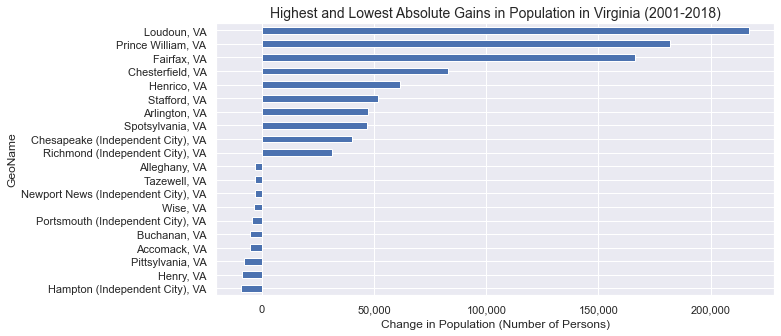

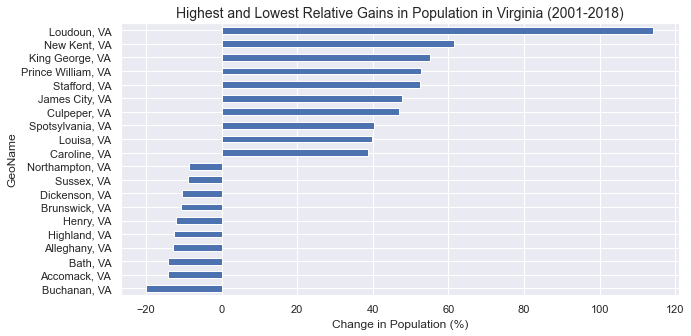

In [33]:
b = pop_ab.iloc[np.r_[:10,-10:0],0].plot(kind='barh')
plt.title('Highest and Lowest Absolute Gains in Population in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Population (Number of Persons)')
fmt2 = '{x:,.0f}' #We want to format our X-axis in terms of population figures separated by commas.
t2 = mtick.StrMethodFormatter(fmt2)
b.xaxis.set_major_formatter(t2)
plt.show()
print()

pop_pct.iloc[np.r_[:10,-10:0],0].plot(kind='barh')
plt.title('Highest and Lowest Relative Gains in Population in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Population (%)')
plt.show()

## 6A. Evaluating Trends in GDP by Industry: Cleaning Up Our Data Further 

In [34]:
ind_gdp['Total GDP'] = ind_gdp.iloc[:,2:20].sum(axis=1)
ind_gdp.head()

#We sum up all the GDPs by industry for each area together.

,Description,Unit,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total GDP
GeoName,,,,,,,,,,,,,,,,,,,,,
"Accomack, VA","Educational services, health care, and social ...",Thousands of dollars,27223.0,28647.0,32077.0,37547.0,41549.0,42389.0,41554.0,48626.0,...,48325.0,46856.0,50557.0,0.0,0.0,0.0,0.0,0.0,0.0,495784.0
"Accomack, VA","Finance, insurance, real estate, rental, and l...",Thousands of dollars,143678.0,150373.0,164952.0,158824.0,181453.0,225503.0,242451.0,224833.0,...,232431.0,241862.0,243938.0,245562.0,251988.0,256643.0,263338.0,266813.0,278947.0,4010465.0
"Accomack, VA",Information,Thousands of dollars,15629.0,23334.0,21770.0,13190.0,11943.0,10707.0,12199.0,13351.0,...,13023.0,11075.0,9689.0,10166.0,9991.0,10189.0,10822.0,10962.0,10824.0,232184.0
"Accomack, VA",Transportation and warehousing,Thousands of dollars,11738.0,11791.0,11112.0,10361.0,9615.0,9953.0,9410.0,8689.0,...,10316.0,12152.0,15499.0,0.0,0.0,0.0,0.0,0.0,0.0,128772.0
"Accomack, VA",Manufacturing,Thousands of dollars,813624.0,694819.0,621442.0,565466.0,534804.0,582652.0,568388.0,681136.0,...,1362066.0,1330363.0,1441586.0,1510046.0,1565767.0,1752051.0,1802328.0,1804397.0,1852963.0,20685860.0


In [35]:
utilities = ind_gdp[(ind_gdp.Description=='Utilities')]
construct = ind_gdp[(ind_gdp.Description=='Construction')]
manu = ind_gdp[(ind_gdp.Description=='Manufacturing')]
transport = ind_gdp[(ind_gdp.Description=='Transportation and warehousing')]
info = ind_gdp[(ind_gdp.Description=='Information')]
finance = ind_gdp[(ind_gdp.Description=='Finance, insurance, real estate, rental, and leasing')]
prof = ind_gdp[(ind_gdp.Description=='Professional and business services')]
educ_health = ind_gdp[(ind_gdp.Description=='Educational services, health care, and social assistance')]
arts = ind_gdp[(ind_gdp.Description=='Arts, entertainment, recreation, accommodation, and food services')]
other = ind_gdp[(ind_gdp.Description=='Other services (except government and government enterprises)')]
govt = ind_gdp[(ind_gdp.Description=='Government and government enterprises')]
natural = ind_gdp[(ind_gdp.Description=='Natural resources and mining')]
trade = ind_gdp[(ind_gdp.Description=='Trade')]

#Each industry gets assigned to its own dataframe.

In [36]:
utilities = utilities.iloc[:,[0,1,20]]
construct = construct.iloc[:,[0,1,20]]
manu = manu.iloc[:,[0,1,20]]
transport = transport.iloc[:,[0,1,20]]
info = info.iloc[:,[0,1,20]]
finance = finance.iloc[:,[0,1,20]]
prof = prof.iloc[:,[0,1,20]]
educ_health = educ_health.iloc[:,[0,1,20]]
arts = arts.iloc[:,[0,1,20]]
other = other.iloc[:,[0,1,20]]
govt = govt.iloc[:,[0,1,20]]
natural = natural.iloc[:,[0,1,20]]
trade = trade.iloc[:,[0,1,20]]

#We isolate each industry's total GDP.

In [37]:
gdp = [utilities['Total GDP'] + construct['Total GDP'] + manu['Total GDP'] + transport['Total GDP'] + 
       info['Total GDP'] + finance['Total GDP'] + prof['Total GDP'] + educ_health['Total GDP'] + 
       arts['Total GDP'] + other['Total GDP'] + govt['Total GDP'] + natural['Total GDP'] + trade['Total GDP']]
gdp = pd.DataFrame(gdp)
gdp

#We now sum up all the industry GDPs incorporating the years 2001 through 2018 together, and proceed to create a new
#dataframe including those sums by area.

GeoName,"Accomack, VA","Albemarle, VA","Alexandria (Independent City), VA","Alleghany, VA","Amelia, VA","Amherst, VA","Appomattox, VA","Arlington, VA","Augusta, VA","Bath, VA",...,"Surry, VA","Sussex, VA","Tazewell, VA","Virginia Beach (Independent City), VA","Warren, VA","Washington, VA","Westmoreland, VA","Wise, VA","Wythe, VA","York, VA"
Total GDP,37336052.0,141730624.0,228049472.0,8931257.0,4697019.0,12311982.0,4395793.0,471951968.0,56712216.0,3674678.0,...,18958412.0,5036141.0,22774316.0,320266944.0,17086276.0,38672556.0,6002795.0,28135840.0,20131536.0,34244952.0


In [38]:
gdp = gdp.transpose()
gdp['Total GDP'] = gdp['Total GDP']*1000/(10**9)
gdp.head()

#We transpose the shape of our dataframe by allocating the cities and counties under the index column and rename our 
#value column to 'Total GDP' for consistency.  In addition, upon observing from our previous database that our units
#were in thousands of dollars, we convert our total GDP figures into billions here.

,Total GDP
GeoName,
"Accomack, VA",37.336052
"Albemarle, VA",141.730628
"Alexandria (Independent City), VA",228.049469
"Alleghany, VA",8.931257
"Amelia, VA",4.697019


In [39]:
gdp['Utilities'] = utilities['Total GDP']*1000/(10**9)
gdp['Construction'] = construct['Total GDP']*1000/(10**9)
gdp['Manufacturing'] = manu['Total GDP']*1000/(10**9)
gdp['Transportation'] = transport['Total GDP']*1000/(10**9)
gdp['Information'] = info['Total GDP']*1000/(10**9)
gdp['Finance'] = finance['Total GDP']*1000/(10**9)
gdp['Professional Services'] = prof['Total GDP']*1000/(10**9)
gdp['Education / Health'] = educ_health['Total GDP']*1000/(10**9)
gdp['Entertainment'] = arts['Total GDP']*1000/(10**9)
gdp['Other Services'] = other['Total GDP']*1000/(10**9)
gdp['Government'] = govt['Total GDP']*1000/(10**9)
gdp['Natural Resources'] = natural['Total GDP']*1000/(10**9)
gdp['Trade'] = trade['Total GDP']*1000/(10**9)
gdp.head()

#Each industry's total GDP from 2001 to 2018 gets its own column and also converts into billions.

,Total GDP,Utilities,Construction,Manufacturing,Transportation,Information,Finance,Professional Services,Education / Health,Entertainment,Other Services,Government,Natural Resources,Trade
GeoName,,,,,,,,,,,,,,
"Accomack, VA",37.336052,0.244069,0.748364,20.685861,0.128772,0.232184,4.010465,2.005698,0.495784,0.762874,0.516269,3.920432,1.941237,1.644048
"Albemarle, VA",141.730628,0.304137,6.472961,4.706183,0.000000,6.013587,31.993336,18.624649,13.134388,6.833805,4.586272,43.129623,0.169251,5.762429
"Alexandria (Independent City), VA",228.049469,0.240045,6.430297,0.619851,3.040367,8.874366,47.857111,58.837185,10.861439,6.388713,16.594492,56.774373,0.000972,11.530259
"Alleghany, VA",8.931257,0.536721,0.459170,0.494300,0.346161,0.000000,2.437811,0.686992,1.010971,0.293714,0.380599,1.645292,0.012304,0.627222
"Amelia, VA",4.697019,0.023576,0.464110,0.364205,0.058966,0.021735,0.855842,0.410122,0.264835,0.043624,0.154925,0.580338,0.766819,0.687922


In [40]:
gdp['Utilities Share'] = gdp['Utilities']/gdp['Total GDP']*100
gdp['Construction Share'] = gdp['Construction']/gdp['Total GDP']*100
gdp['Manufacturing Share'] = gdp['Manufacturing']/gdp['Total GDP']*100
gdp['Transportation Share'] = gdp['Transportation']/gdp['Total GDP']*100
gdp['Information Share'] = gdp['Information']/gdp['Total GDP']*100
gdp['Finance Share'] = gdp['Finance']/gdp['Total GDP']*100
gdp['Professional Services Share'] = gdp['Professional Services']/gdp['Total GDP']*100
gdp['Education / Health Share'] = gdp['Education / Health']/gdp['Total GDP']*100
gdp['Entertainment Share'] = gdp['Entertainment']/gdp['Total GDP']*100
gdp['Other Services Share'] = gdp['Other Services']/gdp['Total GDP']*100
gdp['Government Share'] = gdp['Government']/gdp['Total GDP']*100
gdp['Natural Resources Share'] = gdp['Natural Resources']/gdp['Total GDP']*100
gdp['Trade Share'] = gdp['Trade']/gdp['Total GDP']*100
gdp.head()

#We calculate industry's share of total GDP from 2001 to 2018.

,Total GDP,Utilities,Construction,Manufacturing,Transportation,Information,Finance,Professional Services,Education / Health,Entertainment,...,Transportation Share,Information Share,Finance Share,Professional Services Share,Education / Health Share,Entertainment Share,Other Services Share,Government Share,Natural Resources Share,Trade Share
GeoName,,,,,,,,,,,,,,,,,,,,,
"Accomack, VA",37.336052,0.244069,0.748364,20.685861,0.128772,0.232184,4.010465,2.005698,0.495784,0.762874,...,0.344900,0.621876,10.741535,5.372014,1.327896,2.043264,1.382763,10.500393,5.199363,4.403379
"Albemarle, VA",141.730628,0.304137,6.472961,4.706183,0.000000,6.013587,31.993336,18.624649,13.134388,6.833805,...,0.000000,4.242969,22.573340,13.140878,9.267149,4.821685,3.235907,30.430700,0.119417,4.065761
"Alexandria (Independent City), VA",228.049469,0.240045,6.430297,0.619851,3.040367,8.874366,47.857111,58.837185,10.861439,6.388713,...,1.333205,3.891421,20.985408,25.800185,4.762756,2.801459,7.276707,24.895639,0.000426,5.056034
"Alleghany, VA",8.931257,0.536721,0.459170,0.494300,0.346161,0.000000,2.437811,0.686992,1.010971,0.293714,...,3.875837,0.000000,27.295272,7.691996,11.319470,3.288607,4.261427,18.421729,0.137763,7.022774
"Amelia, VA",4.697019,0.023576,0.464110,0.364205,0.058966,0.021735,0.855842,0.410122,0.264835,0.043624,...,1.255392,0.462740,18.220961,8.731538,5.638364,0.928759,3.298369,12.355454,16.325653,14.645928


## 6B. Evaluating Trends in GDP by Industry: Comparing Between Areas' Industry Shares

In [41]:
def topnine(industry, total=9):
    df = gdp[industry]
    top = df.sort_values(ascending=False)
    top = top.reset_index().head(total)
    top.index = top.index + 1
    return top

#We create a function indicating the top 9 areas in terms of their GDP contribution for a given industry from 2001 to
#2018.

In [42]:
topnine('Utilities')

,GeoName,Utilities
1,"Louisa, VA",18.829410
2,"Surry, VA",16.535195
3,"Chesterfield, VA",9.212141
4,"Fluvanna, VA",4.374536
5,"Prince William, VA",3.785981
6,"Hanover, VA",3.003706
7,"Fairfax, VA",2.948026
8,"Chesapeake (Independent City), VA",2.815059
9,"Russell, VA",2.275161


In [43]:
def GeoPlot(industry):
    df = gdp[industry]
    top = df.sort_values(ascending=False)
    top = top.reset_index()
    top.index = top.index + 1
    others = top[9:].sum()[1]
    top = top[:9]
    top.loc[10] = ('All Other Areas', others)
    
    plot1 = top[industry].plot.pie(subplots=True,
                                   autopct='%0.2f%%',
                                   fontsize=10,
                                   figsize=(10,10),
                                   legend=False,
                                   labels=top['GeoName'],
                                   shadow=False,
                                   explode=(0.15,0,0,0,0,0,0,0,0,0), #We explode the most significant area here.
                                   startangle=90)

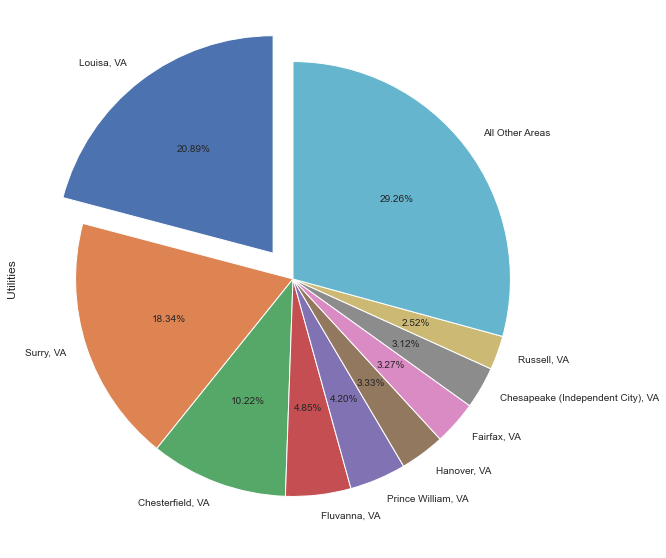

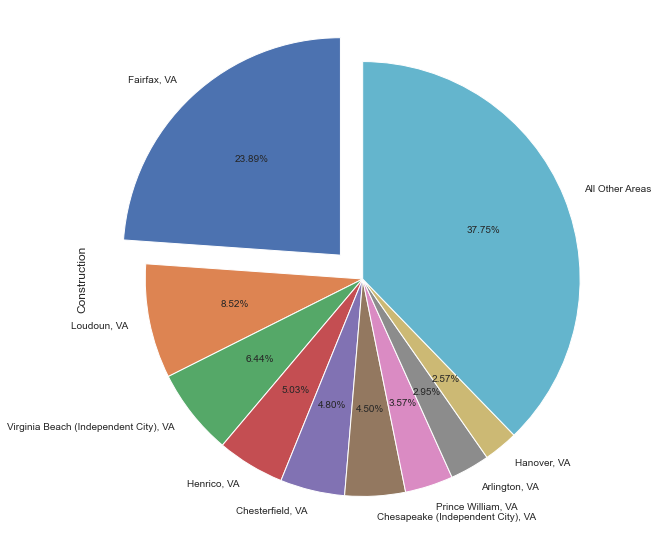

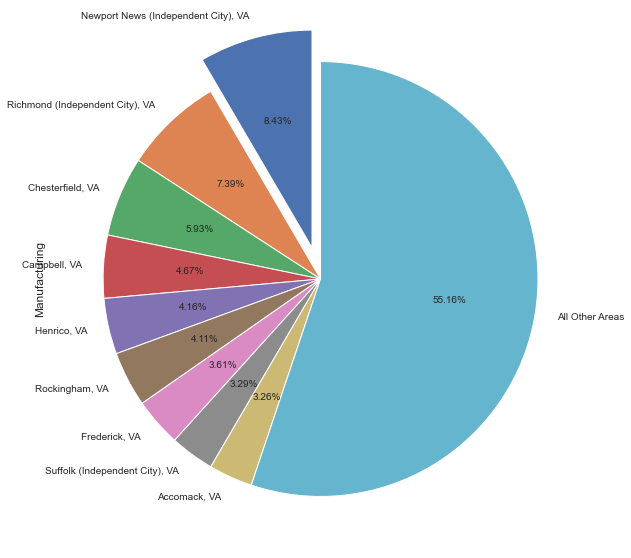

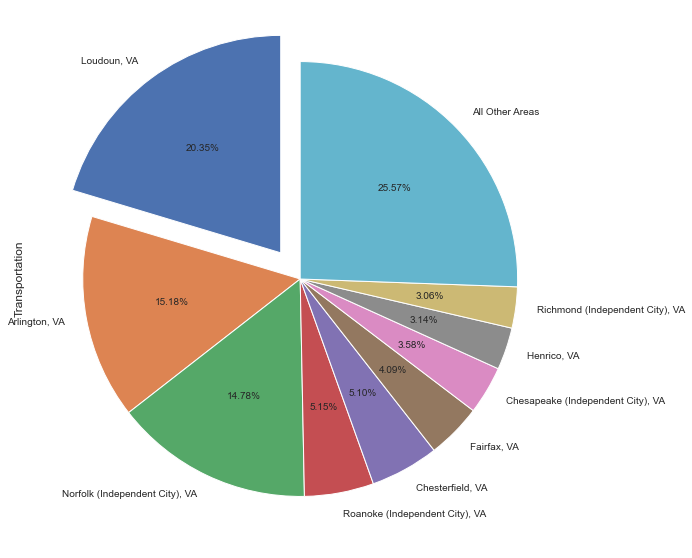

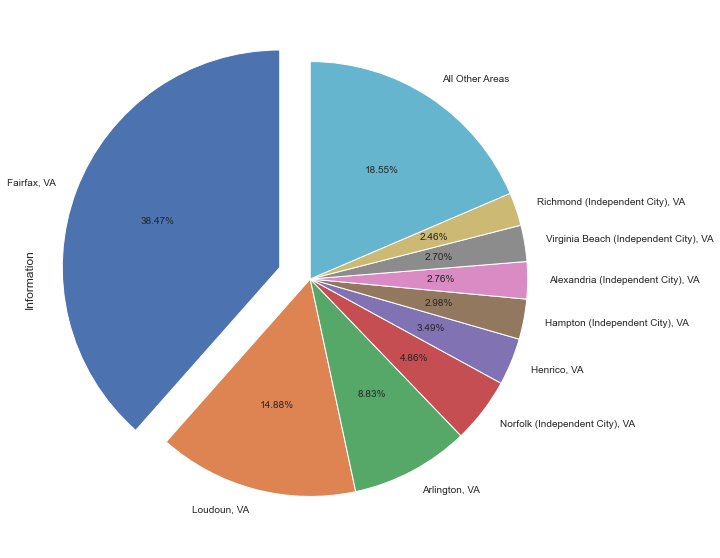

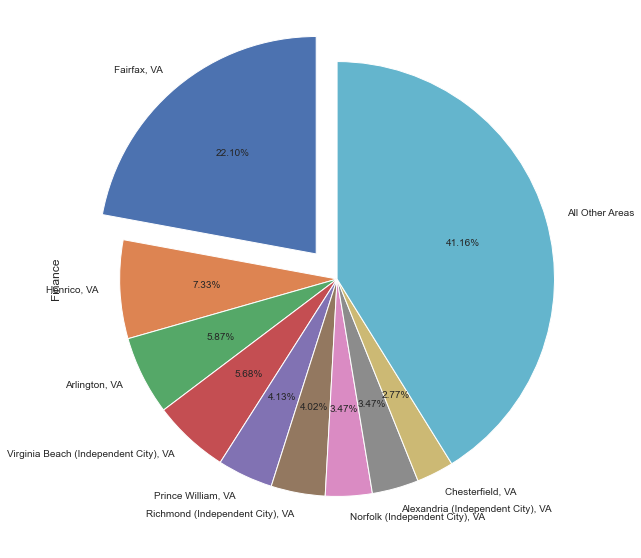

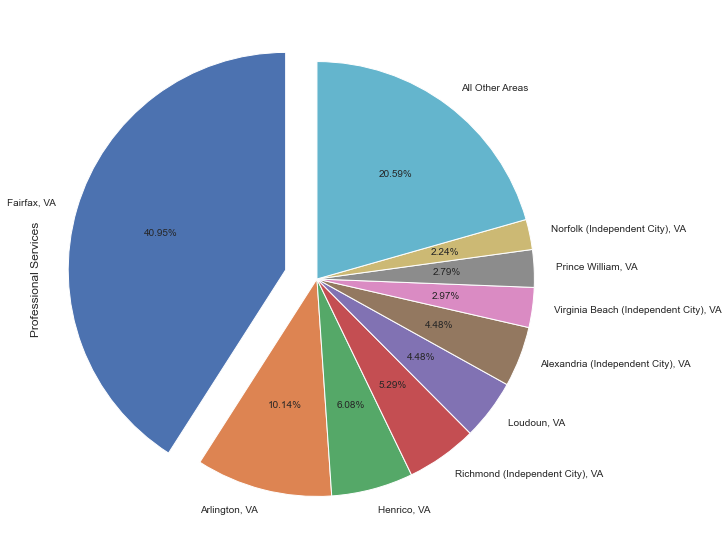

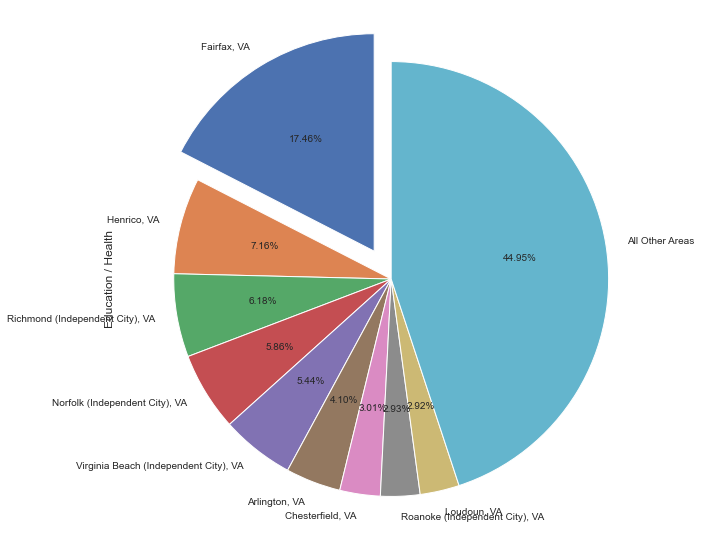

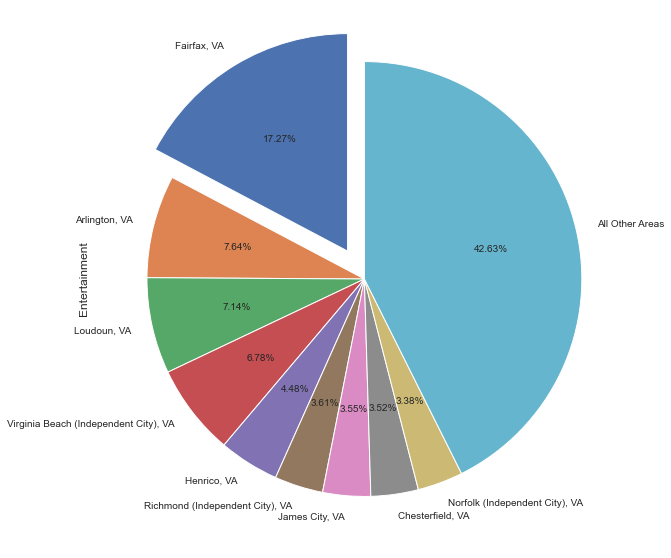

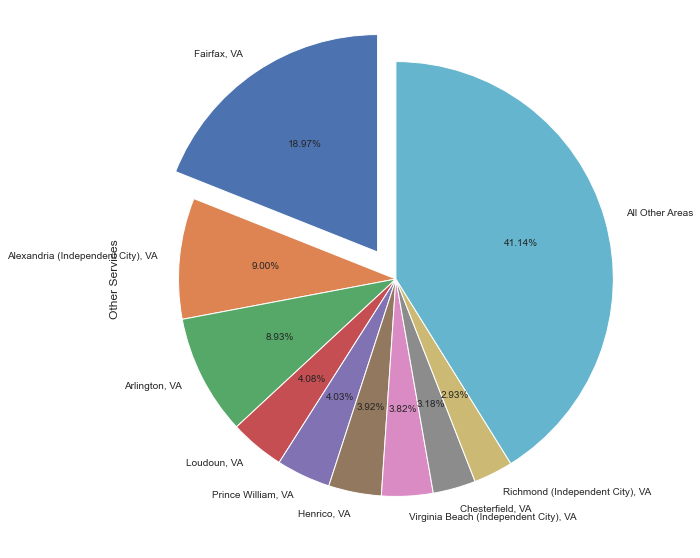

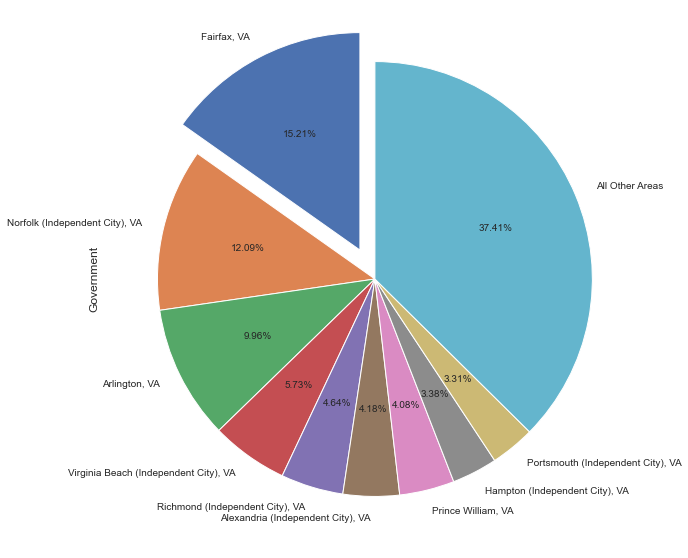

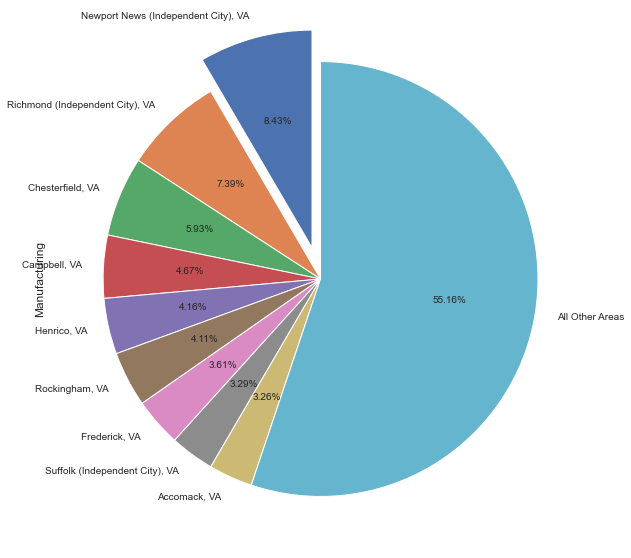

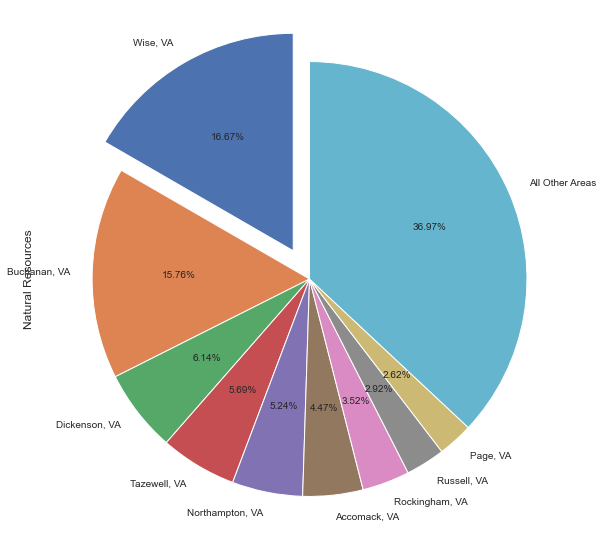

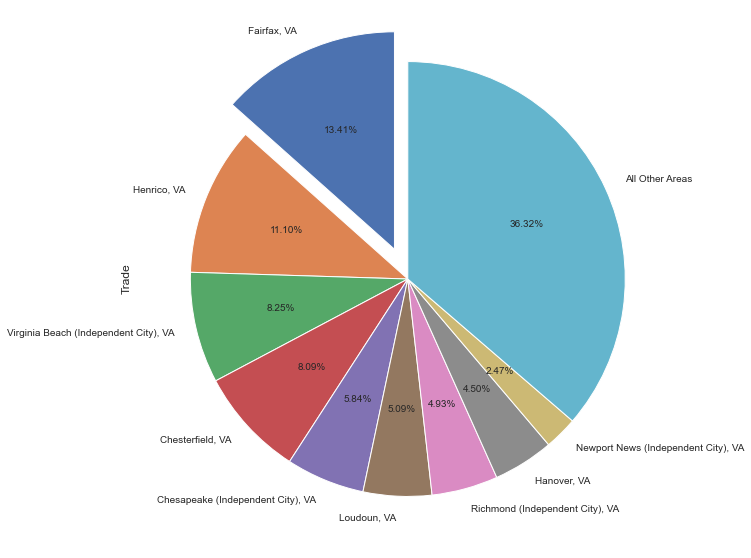

In [44]:
GeoPlot('Utilities')
plt.show()
print()
GeoPlot('Construction')
plt.show()
print()
GeoPlot('Manufacturing')
plt.show()
print()
GeoPlot('Transportation')
plt.show()
print()
GeoPlot('Information')
plt.show()
print()
GeoPlot('Finance')
plt.show()
print()
GeoPlot('Professional Services')
plt.show()
print()
GeoPlot('Education / Health')
plt.show()
print()
GeoPlot('Entertainment')
plt.show()
print()
GeoPlot('Other Services')
plt.show()
print()
GeoPlot('Government')
plt.show()
print()
GeoPlot('Manufacturing')
plt.show()
print()
GeoPlot('Natural Resources')
plt.show()
print()
GeoPlot('Trade')
plt.show()

## 6C. Evaluating Trends in GDP by Industry: Finding the Most Significant Areas by Industry

In [45]:
def IndustryPlot(df, x):
    df = df.loc[:, x].sort_values(ascending=False).head(10)
    df.plot(kind='barh', color=sb.color_palette(), sort_columns=True)
    y = str(x)
    plt.title('10 Virginia Cities / Counties with the Highest '+y+' of\n Total GDP from 2001 to 2018',size=14)
    plt.xlabel('Share of GDP (%)')
    plt.ylabel('GeoName')
    plt.show()

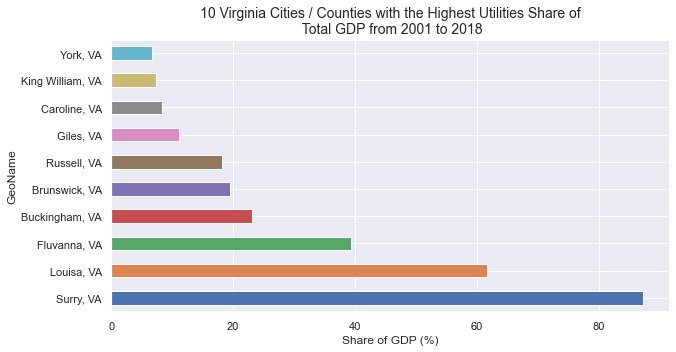

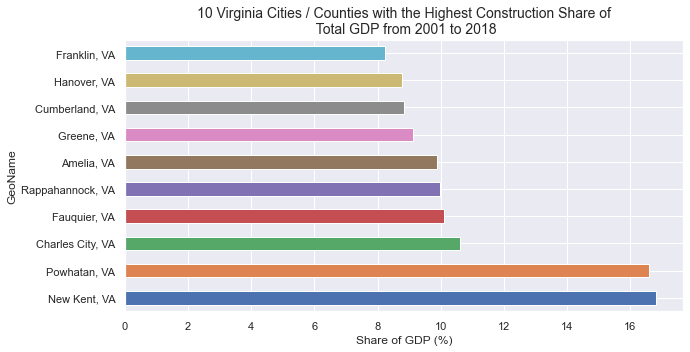

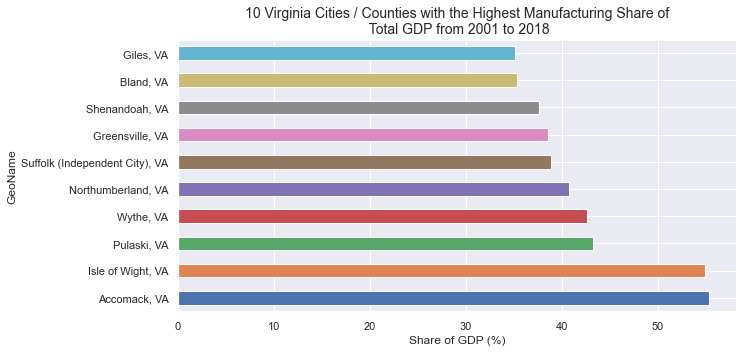

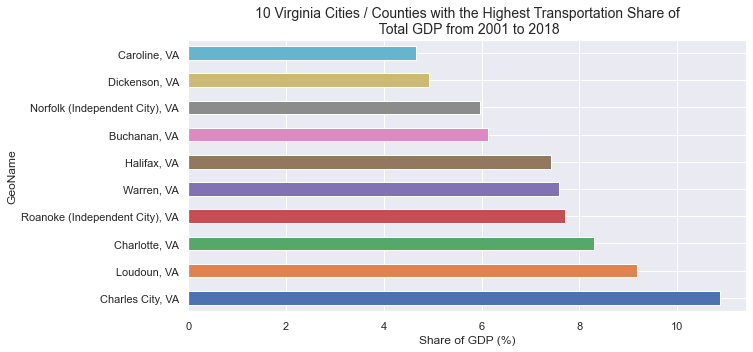

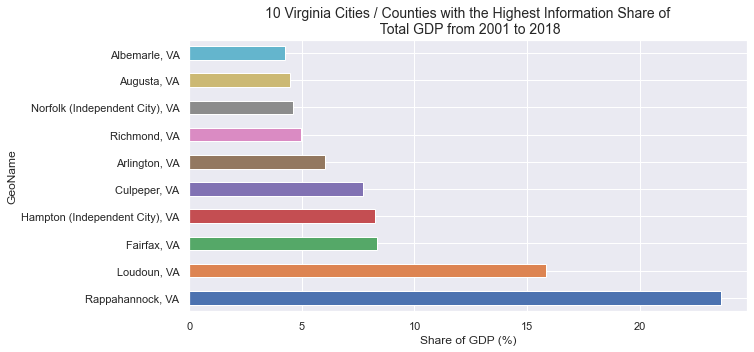

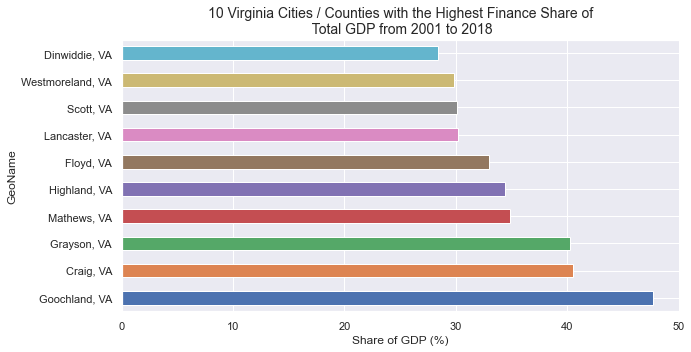

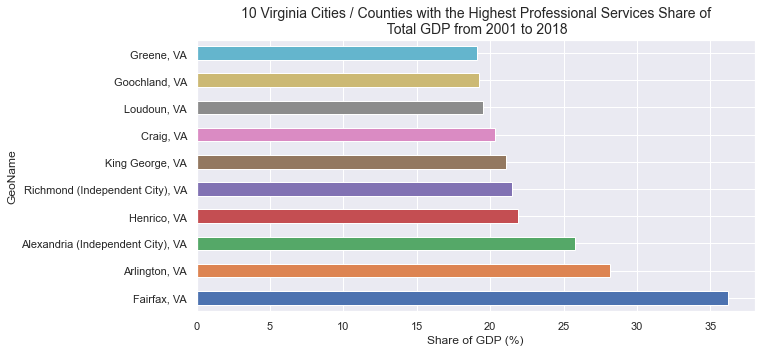

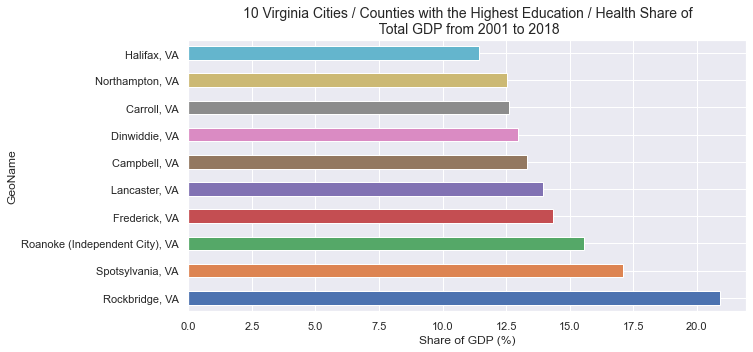

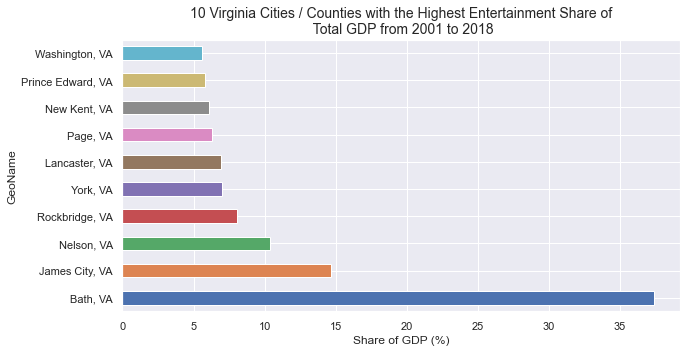

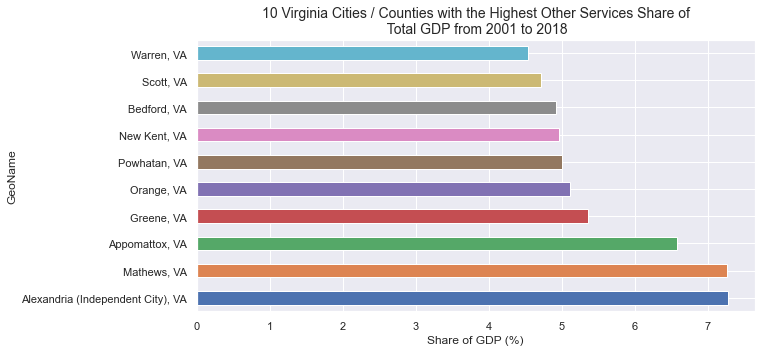

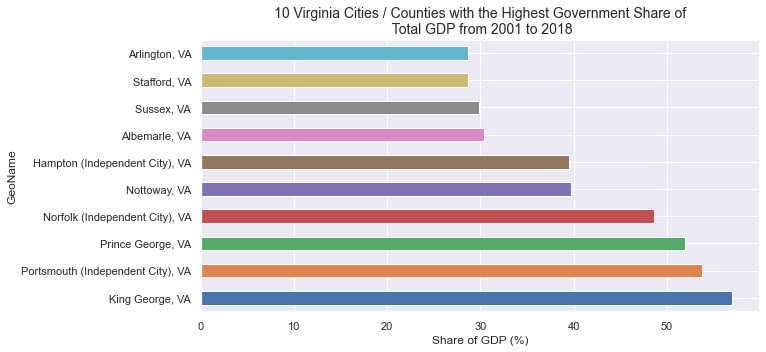

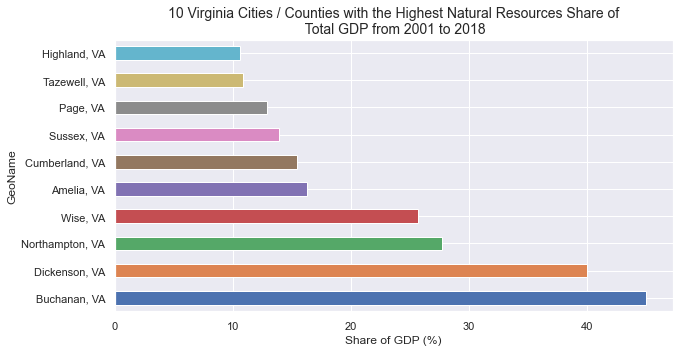

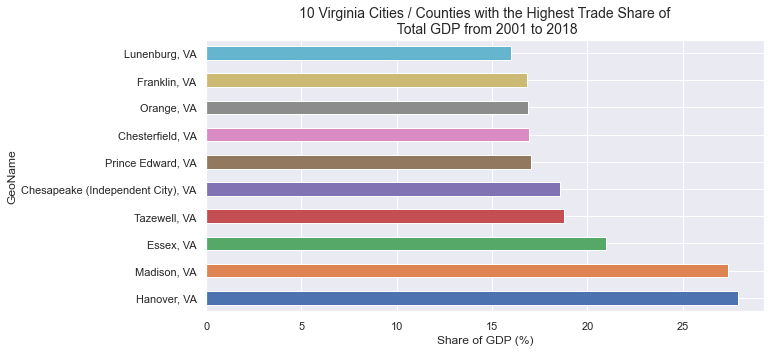

In [46]:
IndustryPlot(gdp,'Utilities Share')
print()
IndustryPlot(gdp,'Construction Share')
print()
IndustryPlot(gdp,'Manufacturing Share')
print()
IndustryPlot(gdp,'Transportation Share')
print()
IndustryPlot(gdp,'Information Share')
print()
IndustryPlot(gdp,'Finance Share')
print()
IndustryPlot(gdp,'Professional Services Share')
print()
IndustryPlot(gdp,'Education / Health Share')
print()
IndustryPlot(gdp,'Entertainment Share')
print()
IndustryPlot(gdp,'Other Services Share')
print()
IndustryPlot(gdp,'Government Share')
print()
IndustryPlot(gdp,'Natural Resources Share')
print()
IndustryPlot(gdp,'Trade Share')

## 6D. Evaluating Trends in GDP by Industry: Isolating Industry Shares Within Areas

In [47]:
share = gdp.drop('Total GDP', axis=1)
share = share.transpose() #We transpose back to the original shape to preserve the industries as the rows.
share = share.iloc[13:]
share = share.rename_axis('Industry Share').reset_index()
share = share.set_index('Industry Share') #We replace our original GeoName index with the Industry Share one.
share

GeoName,"Accomack, VA","Albemarle, VA","Alexandria (Independent City), VA","Alleghany, VA","Amelia, VA","Amherst, VA","Appomattox, VA","Arlington, VA","Augusta, VA","Bath, VA",...,"Surry, VA","Sussex, VA","Tazewell, VA","Virginia Beach (Independent City), VA","Warren, VA","Washington, VA","Westmoreland, VA","Wise, VA","Wythe, VA","York, VA"
Industry Share,,,,,,,,,,,,,,,,,,,,,
Utilities Share,0.653709,0.214588,0.105260,6.009467,0.501935,0.104654,0.705174,0.282340,0.411340,5.759797,...,87.218248,1.309395,0.461959,0.108188,2.568143,0.453024,0.116046,5.425625,0.101189,6.605741
Construction Share,2.004401,4.567087,2.819694,5.141157,9.880948,6.199278,8.229483,1.647837,3.020478,4.071840,...,0.975498,2.142077,3.587515,5.309773,6.444745,1.003689,4.647435,2.771241,2.549199,7.980791
Manufacturing Share,55.404522,3.320512,0.271806,5.534495,7.753961,21.930871,9.186193,0.268578,25.437739,1.716395,...,0.782297,3.284122,17.108203,3.447579,18.112139,27.959445,19.163156,4.445146,42.601804,1.161987
Transportation Share,0.344900,0.000000,1.333205,3.875837,1.255392,3.356941,1.588360,4.381274,2.150022,0.033663,...,0.029544,3.774179,0.000000,0.000000,7.586176,0.844234,1.075566,0.871924,1.711936,0.296146
Information Share,0.621876,4.242969,3.891421,0.000000,0.462740,3.011668,0.506848,6.009411,4.485117,0.871206,...,0.004331,0.002780,1.310336,2.704637,0.842126,2.569528,0.217049,2.909410,1.114088,0.231894
Finance Share,10.741535,22.573340,20.985408,27.295272,18.220961,21.651868,25.836180,17.158127,24.544360,20.405979,...,3.068089,17.831967,20.712240,24.457515,19.845273,23.275795,29.835203,15.732092,14.291899,28.231503
Professional Services Share,5.372014,13.140878,25.800185,7.691996,8.731538,1.809741,7.646016,28.182826,7.517107,8.839087,...,4.095871,10.952672,6.291689,12.160653,8.935897,10.519703,7.834401,6.853696,2.423138,11.635280
Education / Health Share,1.327896,9.267149,4.762756,11.319470,5.638364,7.667230,3.792058,4.200271,8.337177,5.506959,...,0.024121,8.038774,0.000000,8.224182,9.836187,9.126596,3.249536,9.152594,6.729729,4.216849
Entertainment Share,2.043264,4.821685,2.801459,3.288607,0.928759,2.636212,1.693870,3.656058,3.161404,37.380661,...,0.056925,2.823749,3.533446,4.783428,4.123292,5.564316,3.928586,1.419122,4.288242,7.023202


In [48]:
def topfive(geo, total=5):
    df = share.loc[:,geo]
    top = df.sort_values(ascending=False)
    top = top.reset_index().head(total)
    top.index = top.index + 1
    return top

In [49]:
topfive('Fairfax, VA')

,Industry Share,"Fairfax, VA"
1,Professional Services Share,36.207336
2,Finance Share,20.553628
3,Government Share,13.905597
4,Information Share,8.328271
5,Education / Health Share,5.689489


In [50]:
def SharePlot(geo):
    df = share[geo]
    top = df.sort_values(ascending=False)
    top = top.reset_index()
    top.index = top.index + 1
    others = top[5:].sum()[1]
    top = top[:5]
    top.loc[10] = ('All Other Industries', others)
    
    plot2 = top[geo].plot.pie(subplots=True,
                              autopct='%0.2f%%',
                              fontsize=10,
                              figsize=(10,10),
                              legend=False,
                              labels=top['Industry Share'],
                              shadow=False,
                              explode=(0.15,0,0,0,0,0), #We explode the largest industry share here.
                              startangle=90)

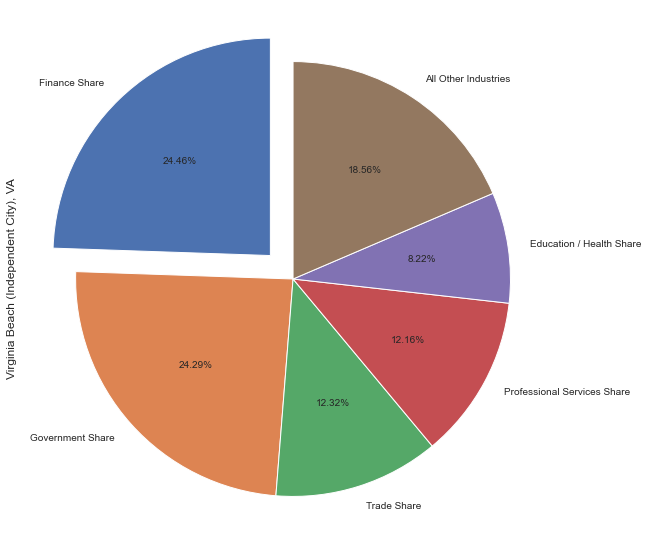

In [55]:
SharePlot('Virginia Beach (Independent City), VA')

## 7. Predictions 

At first glance, we can predict the areas located in the Northern Virginia region will continue to see more people move within their geographic limits.  When considering their trends, other areas further from Washington, DC, such as Spotsylvania and Stafford Counties, could also witness such shifts.  

In addition, while accounting for the impact of globalization and interstate commerce, we can expect that the share of GDP toward industries such as information, finance, and professional services will continue to grow in counties and cities throughout the state.  The rate of such growth, however, may be slower in less urbanized counties and cities.  Given such shifts, personal income may rise as more jobs within these aforementioned industries develop.  

However, we should also consider that, as a result of increased demand for these types of jobs, if the rate at which an area's population grows exceeds that of its personal income, then the relative change in per capita income may be muted at best.  In other words, it is possible for an area to augment its personal income significantly over the next couple of years, but not its per capita income if enough people move there within that time span.

## 8. Conclusions 

As can be seen, the role of geography in impacting the predominant economic sectors of Virginia's counties and cities from 2001 to 2018 should not be minimized.  For example, we can deduce that a plurality of Bath County's economy, which focused primarily on its arts and entertainment sector, may have been buoyed by its proximity to West Virginia and the Appalachian Mountains, making it a popular spot for tourism despite its relatively small population.  Similarly, further to the south of the state, Buchanan County's geography can likewise serve as an explanation as to why a greater share of its economy was based on natural resources, including operations related to mining and quarrying.

From the data, it appears that a highly diversified economy is more prudent toward increasing personal and per capita income over time, as well as encouraging more people to move toward an area.  Specialization is instrumental in bringing a wider array of skills toward boosting growth, and potentially allowing collaboration between different industries.  It is an extension to the accelerating shift toward white-collar occupations throughout the economy today, at both the state and national level.  In addition, specialization may explain why some counties and cities reported higher total GDPs from 2001 to 2018 without necessarily allocating a significantly large share toward one industry, be it a plurality or majority.  As economic diversification in an area accelerates, the rate of urbanization likewise grows, which in turn encourages more people to move and find work there.

Earlier in our project, we observed that the areas witnessing the greatest growth in personal and per capita income, as well as population, in absolute terms from 2001 to 2018 tended to be further up north.  This makes sense considering the rapidly expanding influence of the Washington, DC metropolitan area on the US economy.  Fairfax and Loudoun Counties especially reported considerable shifts in the aforementioned variables.  When observing these variables from a relative perspective though, the impact was more muted, particularly when considering how population growth can outpace that of personal and per capita income, even with significant economic expansion.  In relative terms, Loudoun County is an intriguing case since its population more than doubled from 2001 to 2018, and it outperformed other areas in its rate of growth in personal, but less so per capita, income.

When comparing GDPs by industry, it is evident at first glance that areas with larger overall economies, especially Fairfax County, often contributed more to an industry.  However, this not imply a direct correlation between total GDP and industry share.  In fact, in just two sectors (utilities and manufacturing) did a number of areas report a share of 50% or more.  According to most other industries' numbers, these did not maintain a disproportionate share, indicating that most areas exhibited relatively diversified economies from 2001 to 2018.  This is also apparent when analyzing the industry trends within each individual area.

This project was another terrific opportunity to apply the techniques of data mining toward extracting raw pieces from the Bureau of Economic Analysis with the help of Python.  As mentioned before, any references for this project are listed below.

## References 

Dollar Ticks. (n.d.). Retrieved October 16, 2020, from https://matplotlib.org/3.1.1/gallery/pyplots/dollar_ticks.html

How to convert index of a pandas dataframe into a column? (2013, December 09). Retrieved November 07, 2020, from https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

Merge, join, concatenate and compare. (n.d.). Retrieved October 17, 2020, from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Pandas convert column to float. (n.d.). Retrieved October 12, 2020, from https://java2blog.com/pandas-convert-column-to-float/

Pandas.DataFrame.transpose. (n.d.). Retrieved October 17, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html

Pandas.Index.rename. (n.d.). Retrieved October 16, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.rename.html

Python Pandas : How to convert lists to a dataframe. (2018, September 25). Retrieved October 17, 2020, from https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

Regional Economic Accounts: Download. (2019, November 14). Retrieved October 12, 2020, from https://apps.bea.gov/regional/downloadzip.cfm

Replace invalid values with None in Pandas DataFrame. (2013, June 13). Retrieved October 16, 2020, from https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe

Renaming columns in pandas. (2012, July 5). Retrieved October 17, 2020, from https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Select by partial string from a pandas DataFrame. (2012, July 5). Retrieved October 22, 2020, from https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe

Select rows containing certain values from pandas dataframe. (2016, July 4). Retrieved October 16, 2020, from https://stackoverflow.com/questions/38185688/select-rows-containing-certain-values-from-pandas-dataframe

Slicing multiple column ranges from a dataframe using iloc. (2017, August 31). Retrieved October 16, 2020, from https://stackoverflow.com/questions/45985877/slicing-multiple-column-ranges-from-a-dataframe-using-iloc